# When Model Meets Data

There are three major components of a machine learning system: data, models, and learning. The main question of machine learning is "What do we mean by good models?". The word model has many subtleties.  It is also not entirely obvious how to objectively define the word “good”. One of the guiding principles of machine learning is that good models should perform well on unseen data. This requires us to define some performance metrics, such as accuracy or distance from ground truth, as well as figuring out ways to do well under these performance metrics.

## Data as Vectors

We assume that our data can be read by a computer, and represented adequately in a numerical format. Data is assumed to be tabular, where we think of each row of the table as representing a particular instance or example, and each column to be a particular feature. Data can come in many shapes and forms not just tabular such as images, genomic etc...

Text data is typically converted to numberical e.g. male = 1 and female = -1. Even numerical data that could potentially be directly read into a machine learning algorithm should be carefully considered for units, scaling, and constraints. Without additional information, one should shift and scale all columns of the dataset such that they have an empirical mean of 0 and an empirical variance of 1.

- $N$: Number of examples in the dataset
- $x_n$: The nth example in the dataset
- $D$: Numer of featues in the dataset

Recall that data is represented as vectors, which means that each example (each data point) is a $D$-dimensional vector.

Let us consider the problem of predicting annual salary from age. This is called a supervised learning problem where we have a label $y_n$ (the salary) associated with each example $x_n$ (the age).  The label $y_n$ has various other names, including target, response variable, and annotation. A dataset is written as a set of example label pairs: $\{ (x_1, y_1), \cdots, (x_n, y_n), \cdots, (x_N, y_N) \}$

Representing data as vectors xn allows us to use concepts from linear algebra. In many machine learning algorithms, we need to additionally be able to compare two vectors. Computing the similarity or distance between two examples allows us to formalize the intuition that examples with similar features should have similar labels. The comparison of two vectors requires that we construct a geometry (notebook 3) and allows us to optimize the resulting learning problem using techniques

Since we have vector representations of data, we can manipulate data to find potentially better representations of it. We will discuss finding good representations in two ways: finding lower-dimensional approximations of the original feature vector, and using nonlinear higher-dimensional combinations of the original feature vector. An example of finding a low-dimensional approximation of the original data space by finding the principal components. Finding principal components is closely related to concepts of eigenvalue and singular value decomposition. For the high-dimensional representation, we will see an explicit feature map $\phi(.)$ that allows us to represent inputs $x_n$ using a higher-dimensional representation $\phi(x_n)$. The main motivation for higher-dimensional representations is that we can construct new features as non-linear combinations of the original features, which in turn may make the learning problem easier.

### Models as Functions

Once we have data in an appropriate vector representation, we can get to the business of constructing a predictive function (known as a predictor). A predictor is a function that, when given a particular input example (in our case, a vector of features), produces an output. For now, consider the output to be a single number, i.e., a real-valued scalar output. This can be written as:

\begin{equation}
f: \mathbb{R}^D \rightarrow \mathbb{R}
\end{equation}

where the input vector $x$ is $D$-dimensional (has $D$ features), and the function $f$ then applied to it (written as $f(x)$) returns a real number.

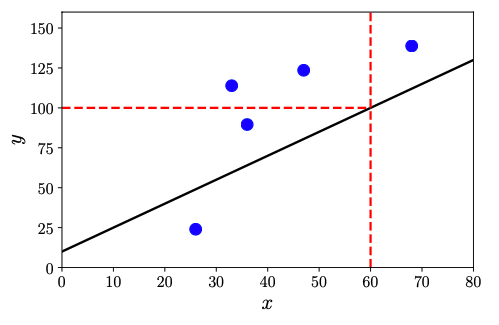

_Example function (black solid diagonal line) and its prediction at $x = 60$, i.e., $f(60) = 100$_

The above figure illustrates a possible function that can be used to compute the value of the prediction for input values $x$.

### Models as Probability Distributions

We often consider data to be noisy observations of some true underlying effect, and hope that by applying machine learning we can identify the signal from the noise. This requires us to have a language for quantify- ing the effect of noise. We often would also like to have predictors that express some sort of uncertainty, e.g., to quantify the confidence we have about the value of the prediction for a particular test data point. Probability theory provides a language for quantifying uncertainty. The figure below illustrates the predictive uncertainty of the function as a Gaussian distribution.

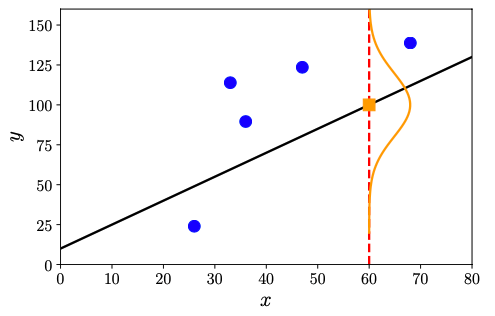

_Example function (black solid diagonal line) and its predictive uncertainty at $x = 60$ (drawn as a Gaussian)._

Instead of considering a predictor as a single function, we could con- sider predictors to be probabilistic models, i.e., models describing the distribution of possible functions

### Learning is Finding Parameters

The goal of learning is to find a model and its corresponding parameters such that the resulting predictor will perform well on unseen data. There are conceptually three distinct algorithmic phases when discussing machine learning algorithms:

1. Prediction or inference
2. Training or parameter estimation
3. Hyperparameter tuning or model selection

The prediction phase is when we use a trained predictor on previously un- seen test data. In other words, the parameters and model choice is already fixed and the predictor is applied to new vectors representing new input data points.

The training or parameter estimation phase is when we adjust our predictive model based on training data. We would like to find good predic- tors given training data, and there are two main strategies for doing so: finding the best predictor based on some measure of quality (sometimes called finding a point estimate), or using Bayesian inference. Finding a point estimate can be applied to both types of predictors, but Bayesian inference requires probabilistic models.

We use numerical methods to find good parameters that "fit" the data, and most training methods can be thought of as hill-climbing approaches to find the maximum of an objective, for example the maximum of a likelihood. To apply hill-climbing approaches we use the gradients.

We are interested in learning a model based on data such that it performs well on future data. It is not enough for the model to only fit the training data well, the predictor needs to per- form well on unseen data. We simulate the behavior of our predictor on future unseen data using cross-validation. As we will see in this chapter, to achieve the goal of performing well on unseen data, we will need to balance between fitting well on training data and finding "simple" explanations of the phenomenon. This trade-off is achieved using regularization or by adding a prior. We often need to make high-level modeling decisions about the structure of the predictor, such as the number of components to use or the class of probability distributions to consider. The choice of the number of components is an example of a hyperparameter, and this choice can affect the performance of the model significantly. The problem of choosing among different models is called model selection. For non-probabilistic models, model selection is often done using nested cross-validation, which is described in Section. We also use model selection to choose hyperparameters of our model.

## Empirical Risk Minimisation

### Hypothesis Class of Functions

Assume we are given $N$ examples $x_n \in \mathbb{R}^D$ and corresponding scalar labels $y_n \in \mathbb{R}$. We consider the supervised learning setting, where we obtain pairs $(x_1, y_1), \cdots , (x_N , y_N )$. Given this data, we would like to estimate a predictor $f(·,\theta):\mathbb{R}^D \rightarrow \mathbb{R}$, parametrized by $\theta$.

Ordinary least-squares from regression can be used to illustrate empirical risk minimization. When the label $y_n$ is real-valued, a popular choice
of function class for predictors is the set of affine functions. The predictor linear function:

\begin{equation}
f(x_n, \theta) = \theta^{\top}x_n
\end{equation}

This linear predictor is equivalent to the affine mode

\begin{equation}
f(x_n, \theta) = \theta_0 \sum^D_{d=1} \theta_d x_n^{(d)}
\end{equation}

The predictor takes the vector of features representing a single example xn as input and produces a real-valued output, i.e., $f : \mathbb{R}^{D+1} \rightarrow \mathbb{R}$

Given the class of functions, we want to search for a good predictor. We now move on to the second ingredient of empirical risk minimisation: how to measure how well the predictor fits the training data.

### Loss Function for Training

Consider the label $y_n$ for a particular example; and the corresponding prediction $\hat{y}_n$ that we make based on $x_n$. To define what it means to fit the data well, we need to specify a loss function $\ell(y_n , \hat{y}_n)$ that takes the ground truth label and the prediction as input and produces a non-negative number (referred to as the loss) representing how much error we have made on this particular prediction. Our goal for finding a good parameter vector $\theta^∗$ is to minimize the average loss on the set of N training examples.

One assumption that is commonly made in machine learning is that the set of examples $(x_1 , y_1 ), \cdots , (x_N , y_N)$ is independent and identically distributed. The word independent means that two data points $(x_i , y_i )$ and $(x_j , y_j)$ do not statistically depend on each other, meaning that the empirical mean is a good estimate of the population mean. This implies that we can use the empirical mean of the loss on the training data. For a given training set $\{(x_1, y_1), \cdots , (x_N , y_N )\}$, we introduce the notation of an example matrix $X := [x_1, \cdots, x_n]^{\top} \in \mathbb{R}^{N \times D}$ and a label vector $y := [y_1, \cdots, y_N]^{\top} \in \mathbb{R}^N$. Using this matrix notation the average loss is given by

\begin{equation}
R_{emp}(f, X, y) = \frac{1}{n} \sum^N_{n=1} \ell(y_n, \hat{y}_n)
\end{equation}

where $\hat{y}_n = f(x_n, \theta)$. The above equation is called the emperical risk and depends on three arguments, the predictor $f$ and the data $X, y$. This general strategy for learning is called empirical risk minimization.

**Example Least-Squares Loss**

Continuing the example of least-squares regression, we specify that we measure the cost of making an error during training using the squared loss: $\ell(y_n, \hat{y}_n) = (y_n - \hat{y}_n)^2$. We wish to minimize the empirical risk which is the average of the losses over the data:

\begin{equation}
\underset{\theta \in \mathbb{R}^D}{min} \frac{1}{N} \sum^N_{n=1} (y_n - f(x_n, \theta))^2
\end{equation}

where we substituted the predictor $\hat{y} = f(x_n, \theta)$. By using our choice of
a linear predictor $f(x_n, \theta) = \theta^{\top}x_n$, we obtain the optimization problem

\begin{equation}
\underset{\theta \in \mathbb{R}^D}{min} \frac{1}{N} \sum^N_{n=1} (y_n - \theta^{\top}x_n)^2
\end{equation}

This equation can be equivalently expressed in matrix form

\begin{equation}
\underset{\theta \in \mathbb{R}^D}{min} \frac{1}{N} \left\| y - X \theta \right\|^2
\end{equation}

This is known as the least-squares problem. There exists a closed-form analytic solution for this by solving the normal equations

We are not interested in a predictor that only performs well on the training data. Instead, we seek a predictor that performs well (has low risk) on unseen test data. More formally, we are interested in finding a predictor $f$ (with parameters fixed) that minimizes the expected risk

\begin{equation}
R_{true}(f) = \mathbb{E}_{x,y}[\ell (y, f(x))]
\end{equation}

where y is the label and $f(x)$ is the prediction based on the example $x$. The notation $R_{true}(f)$ indicates that this is the true risk if we had access to an infinite amount of data. The expectation is over the (infinite) set of all possible data and labels. There are two practical questions that arise from our desire to minimize expected risk, which we address in the following two sections:

- How should we change our training procedure to generalize well?
- How do we estimate expected risk from (finite) data?

Many machine learning tasks are specified with an associated performance measure, e.g., accuracy of prediction or root mean squared error. The performance measure could be more complex, be cost sensitive, and capture details about the particular application. In principle, the de- sign of the loss function for empirical risk minimization should correspond directly to the performance measure specified by the machine learning task. In practice, there is often a mismatch between the design of the loss function and the performance measure. This could be due to issues such as ease of implementation or efficiency of optimization.

### Regularization to Reduce Overfitting